In [80]:
import pandas as pd
import numpy as np
from rectpack import newPacker
import rectpack.packer as packer
import matplotlib.pyplot as plt

In [81]:
def plot_solution(all_rects, pal_812, pal_1012):
    # Plot
    plt.figure(figsize=(10,10))
    # Loop all rect
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x+w, x+w, x, x
        y1, y2, y3, y4, y5 = y, y, y+h, y+h,y

        # Pallet type
        if [w, h] == pal_812:
            color = '--k'
        else:
            color = '--r'

        plt.plot([x1,x2,x3,x4,x5],[y1,y2,y3,y4,y5], color)
    
    plt.show()

In [82]:
# Function Solver
def solver(n_812, n_1012, bins):
    # Pallets to load
    rectangles = [pal_812 for i in range(n_812)] + [pal_1012 for i in range(n_1012)]
    
    # Build the Packer
    pack = newPacker(mode = packer.PackingMode.Offline, bin_algo = packer.PackingBin.Global,
                     rotation=True)

    # Add the rectangles to packing queue
    for r in rectangles:
        pack.add_rect(*r)

    # Add the bins where the rectangles will be placed
    for b in bins:
        pack.add_bin(*b)

    # Start packing
    pack.pack()
    
    # Full rectangle list
    all_rects = pack.rect_list()

    # Pallets with dimensions
    all_pals = [sorted([p[3], p[4]]) for p in all_rects]

    # Count number of 80 x 120 
    p_812, p_1012 = all_pals.count(pal_812), all_pals.count(pal_1012)
    print("{:,}/{:,} Pallets 80 x 120 (cm) | {:,}/{:,} Pallets 100 x 120 (cm)".format(p_812, n_812, p_1012, n_1012))
    
    return all_rects, all_pals

In [83]:
# Pallets Count
#-- 80 x 120 cm

bx = 0
by = 0 
pal_812 = [80 + bx, 120 + by]
#-- 100 x 120 cm
bx = 0
by = 0
pal_1012 = [100 + bx, 120 + by]

# Number of pallets
n_812 = 14
n_1012 = 0 # 100 x 120 cm
rectangles = [pal_812 for i in range(n_812)] + [pal_1012 for i in range(n_1012)]

# Container size
bins20 = [(236, 595)] 
bins40 = [(236, 1203.396)] 
# https://www.dsv.com/fr-fr/nos-solutions/modes-de-transport/fret-maritime/dimensions-de-conteneurs-maritimes/dry-container
# https://www.icontainers.com/help/how-many-pallets-fit-in-a-container/

---

### Example 1
Link: https://www.globalfreightforwarders.com.au/how-many-pallets-fit-into-a-20-ft-or-40-ft-container/
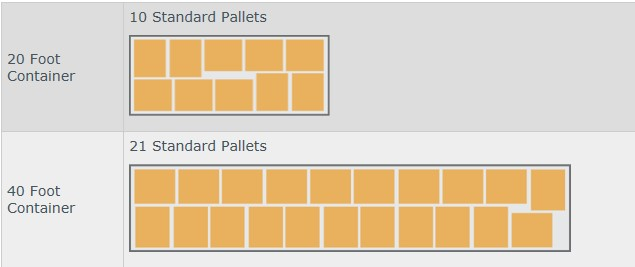

#### 100% US Pallet (100 x 120 cm) | 20'

8/8 Pallets 80 x 120 (cm) | 2/2 Pallets 100 x 120 (cm)


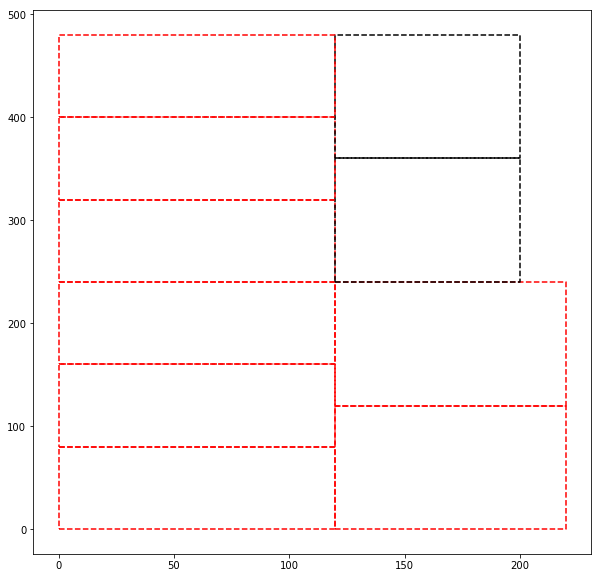

In [85]:
# Test 1
n_812 = 8
n_1012 = 2
all_rects, all_pals = solver(n_812, n_1012, bins20)
plot_solution(all_rects, pal_812, pal_1012)

#### 100% US Pallet (100 x 120 cm) | 40'

0/0 Pallets 80 x 120 (cm) | 20/25 Pallets 100 x 120 (cm)


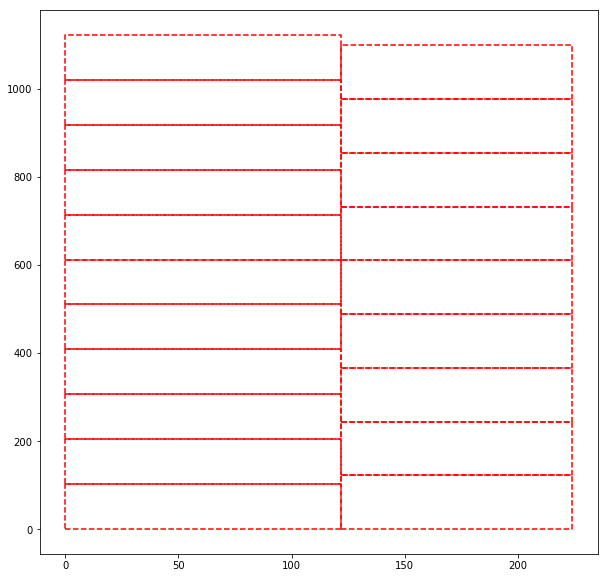

In [35]:
# Test 1
n_812 = 0
n_1012 = 25 # 100 x 120 cm
all_rects, all_pals = solver(n_812, n_1012, bins40)
plot_solution(all_rects)

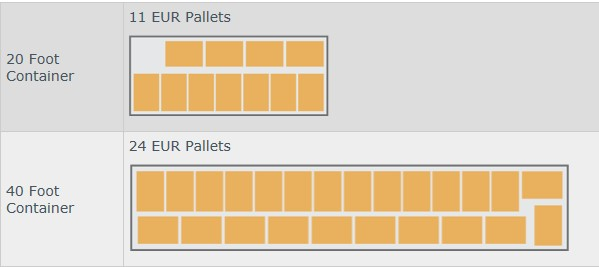

#### 100% EU Pallet (100 x 120 cm) | 20'

11/12 Pallets 80 x 120 (cm) | 0/0 Pallets 100 x 120 (cm)


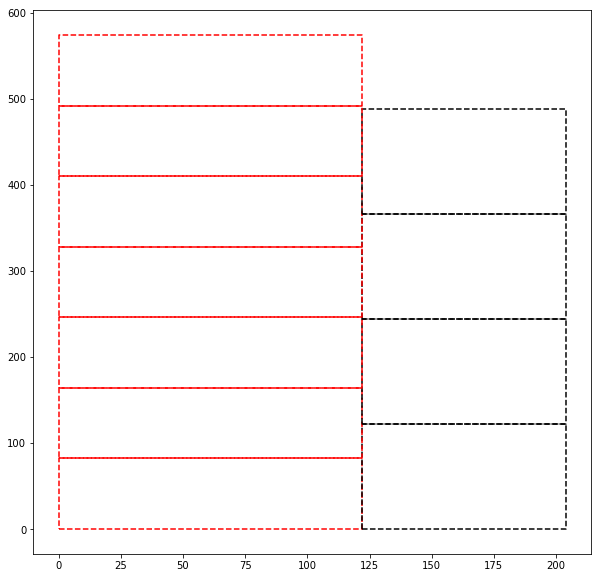

In [36]:
# Test 1
n_812 = 12
n_1012 = 0 # 100 x 120 cm
all_rects, all_pals = solver(n_812, n_1012, bins20)
plot_solution(all_rects)

#### 100% US Pallet (100 x 120 cm) | 40'

0/0 Pallets 80 x 120 (cm) | 20/25 Pallets 100 x 120 (cm)


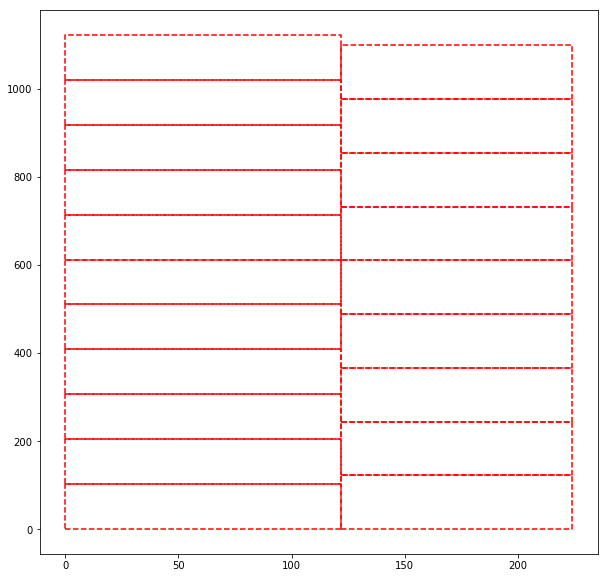

In [38]:
# Test 1
n_812 = 0
n_1012 = 25 # 100 x 120 cm
all_rects, all_pals = solver(n_812, n_1012, bins40)
plot_solution(all_rects)

---

#### 100% Euro Pallet (80 x 120 cm) | 40'

0/0 Pallets 80 x 120 (cm) | 20/22 Pallets 100 x 120 (cm)


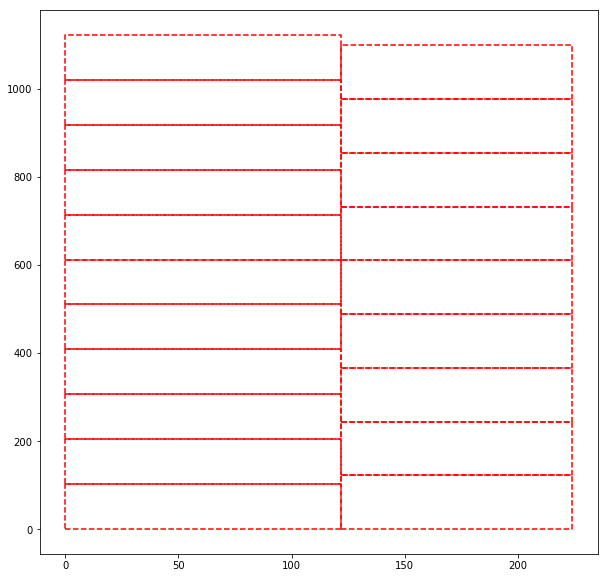

In [18]:
# Test 1
n_812 = 0
n_1012 = 22 # 100 x 120 cm
all_rects, all_pals = solver(n_812, n_1012, bins40)
plot_solution(all_rects)

---

#### 100% American Pallet (100 x 120 cm) | 40'

0/0 Pallets 80 x 120 (cm) | 20/24 Pallets 100 x 120 (cm)


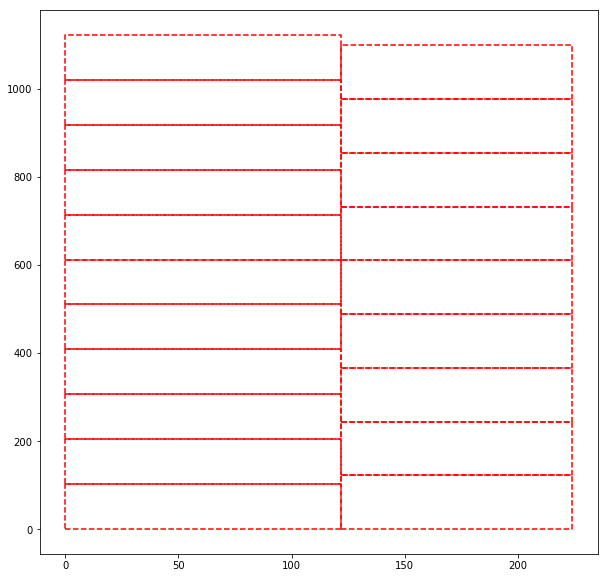

In [20]:
# Test 1
n_812 = 0
n_1012 = 24 # 100 x 120 cm
all_rects, all_pals = solver(n_812, n_1012, bins40)
plot_solution(all_rects)

---

### Example 3
Link: https://www.globalfreightforwarders.com.au/how-many-pallets-fit-into-a-20-ft-or-40-ft-container/
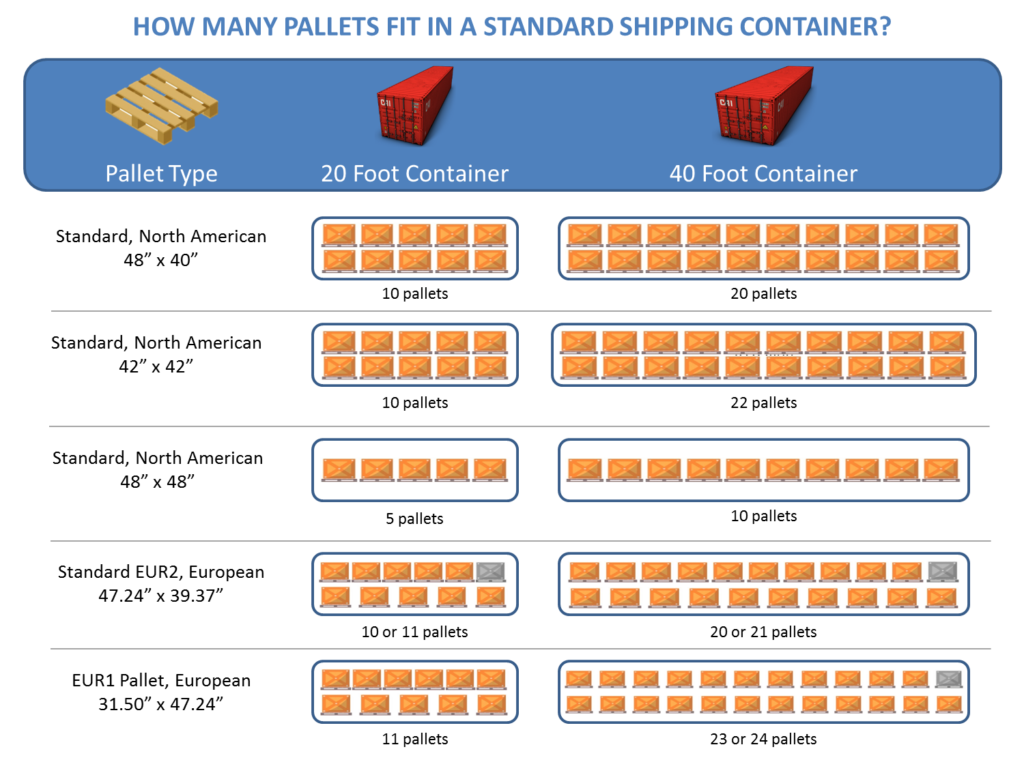

#### 100% US Pallet (100 x 120 cm) | 20'

0/0 Pallets 80 x 120 (cm) | 9/12 Pallets 100 x 120 (cm)


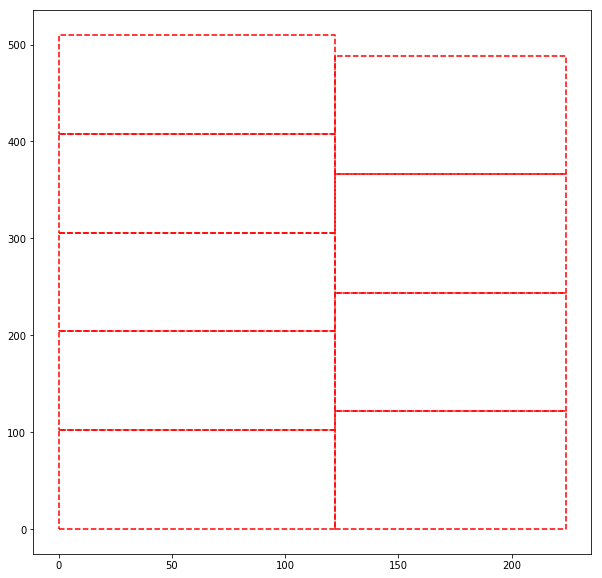

In [40]:
# Test 1
n_812 = 0
n_1012 = 12 
all_rects, all_pals = solver(n_812, n_1012, bins20)
plot_solution(all_rects)

In [ ]:
link = 'https://oceanair.net/size-matters-how-to-choose-the-right-ocean-freight-container/'